# PHYS250 assignment 2: random walkers

### Introduction
For the first assingment, you evaluated multiple algorithms and generation parameters for random numbers and performed tests of those random numbers for uniformity and perhaps intrinsic randomness. The purpose of that assignment was to gain familiarity with basic (python) syntax, libraries, and functions, to practice using GitHub as a development tool for your software, and to begin to establish your own approach to programming for a specific purpose.

For your second assignment, we're going to elaborate on some of these skills, focus a bit more on quantitative analysis of important physical and emergent phenomena, and do a bit more plotting, graphing, and visualizing.

### Assignment Details
Specifically, I want you to use the random walker discussion and the examples (much of which is included in this repository as a starting point) to evaluate properties of random walks in more detail. 

1. Plot the average and RMS displacement (length of walk) for a one-dimensional random walk with a uniform stepsize.
1. Do the same for a 2D random walk.
1. Measure the distribution of endpoints of a random walk in 2D with a number of steps = `Nsteps`, where `Nsteps = 10^y` and `y=0, 1, 2, 4, 6`.
1. Do a scatter plot of the endpoints of 10000 random walks with `Nsteps = 1, 10`, superimposed on the same plot with large `Nsteps` (and justify what large means)
1. Write a routine that plots a histogram of the endpoints of `W` 2D random walks with `Nsteps` steps and 50 bins, along with the prediction given by a normal, or Gaussian, distribution for `x` in `(−3sigma, 3sigma)`, where `sigma=sqrt(Nsteps)xL` (where `L` is the fixed length of each step).
1. Do a histogram with `W = 10000` and `N = 1, 2, 3, 5`. How quickly does the Gaussian distribution become a good approximation to the radom walk? How are you quanitfying "good"?
1. Compare your measurement to the expectation given by the Gaussian and compute a chi-squared. Assess how well your measurement matches the expectation.

*Optional*
1. Update the model to perform random walks that allow for a uniform direction in angle (i.e. not just `+/- 1` in `x,y`)
1. Extrapolate to 3D
1. Randomize the length of the steps taken.
1. Add an external *force* or a *field* that creates a preferred direction.


## Setup

In [2]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

In [785]:
# define the number of steps 
nsteps      = 100000         # "Full" simulation
nsteps_test = 100            # "Fast" simulation
stepsize = 1

Some useful functions for later

In [40]:
def randomSteps(nsteps, stepsize, dim=1, bias=None):
    '''
    This function returns the steps using random number generators.
    Parameters
    ----------
    nsteps: int, total number of steps
    stepsize: int/float, size of a step
    dim: int, dimension of random walk
    bias: array-like, [-0.5, 0.5]. If bias[i] > 0, random walker is biased to be positive, vice versa.
         (Consider a random walker in a wind)
         
    Returns
    ----------
    steps: array with shape (nsteps, dim)
    '''
    # Set default bias to be zeros in all directions
    if bias is None:
        bias = [0] * dim
    # Error processing
    elif len(bias) != dim:
        print ('bias must have a dimension of dim=%d!' % dim)
        raise RunTimeError
    
    # initialize steps. Now, all steps are forward (positive)
    steps = np.ones((nsteps, dim)) * stepsize
    
    # Determine whether a walker steps forward or backward using random numbers
    # Rule: If a random number is less than a certain value, assign a step of -stepsize,
    # Otherwise, assign stepsize.
    
    # Generate random numbers
    rand_nums = np.random.rand(nsteps, dim)
    
    # Apply the rule
    for i in range(dim):
        steps[rand_nums[:, i] < (0.5 - bias[i]), i] = -stepsize  # For arrays, you can selectively substitute like this.
    return steps

def getAvgDisp(steps):
    '''
    Computes the average displacement of a walker
    Parameters
    ----------
    steps: array with shape (nsteps, dim)
         
    Returns
    ----------
    avgDisps: array with shape (nsteps, dim), average displacements
    '''
    nsteps, dim = steps.shape
    avgDisps = np.empty((nsteps, dim))
    for i in range(dim):
        avgDisps[:, i] = np.cumsum(steps[:, i]) / np.arange(1, nsteps+1)
    return avgDisps

def getRMSDisp(steps):
    '''
    Computes the length of a walk
    Parameters
    ----------
    steps: array with shape (nsteps, dim)
         
    Returns
    ----------
    rmsDisps: array with shape (nsteps, ), N-th element indicates RMS displacement after N steps
    '''
    nsteps, dim = steps.shape
    rmsDisps = np.zeros(nsteps)
    for i in range(dim):
        rmsDisps += np.cumsum(steps[:, i]**2)
    rmsDisps = np.sqrt(rmsDisps)
        
    return rmsDisps

#### Before we tackle assignments, let's see if the functions above work!

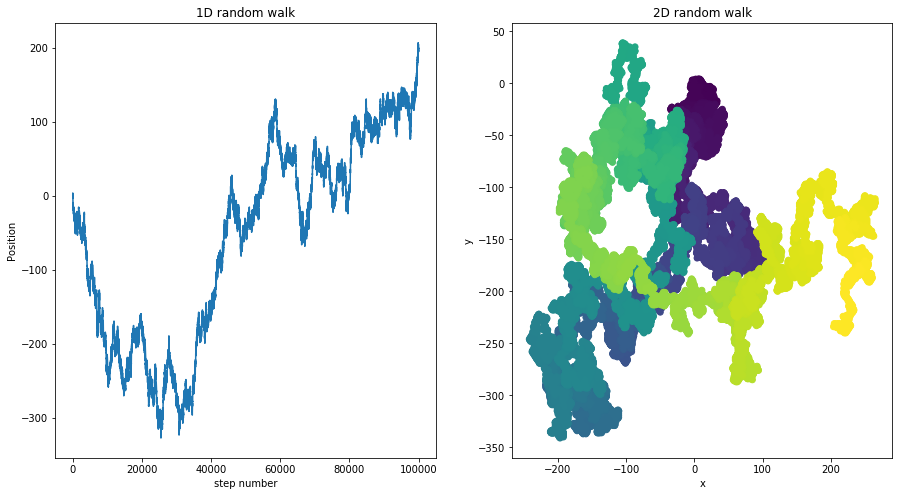

In [786]:
# Visualizing 1D/2D random walk
import matplotlib as mpl
import matplotlib.cm as cm

steps = randomSteps(nsteps, stepsize, dim=1) # random walk steps
walk = np.cumsum(steps, axis=0) # array which contains info about position after n steps

steps_2d = randomSteps(nsteps, stepsize, dim=2) # random walk steps
walk_2d = np.cumsum(steps_2d, axis=0) # position after n steps. At step=0, the position is 0.

# Color trajectory by step number
cmap = mpl.cm.get_cmap('viridis') # specify which colormap you use
normalize = mpl.colors.Normalize(vmin=0, vmax=nsteps) # normalize colormap 
colors = [cmap(normalize(value)) for value in range(nsteps)] # make a list of RGB values

# make figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(range(nsteps), walk)
ax2.scatter(walk_2d[:, 0], walk_2d[:, 1], color=colors, alpha=1)


ax1.set_xlabel('step number')
ax1.set_ylabel('Position')
ax1.set_title('1D random walk')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('2D random walk')

plt.show()

#### Comments:
This assignment involved many vidualizations. Matplotlib is a really helpful library for scientifc vidualziations. Perhaps, it is worth commenting what you are doing when you call matplotlib tools. <br>


Consider fig, ax = plt.subplots() for example. 

fig is an object of matplotlib.figure.Figure class. ax is an ax.Axes class object. 

If you are not familiar with the language, here is a good summary about objects, class, and instance I found on Stack Overflow. <br>

###### "A blueprint for a house design is like a class description. All the houses built from that blueprint are objects of that class. A given house is an instance"

What does ax.plot() mean?
- The ax.Axes class contains many attributes and methods(functions in class). We are just calling a method called "plot" for plotting.

## 1.
__Plot the average and RMS displacement (length of walk) for a one-dimensional random walk with a uniform stepsize.__

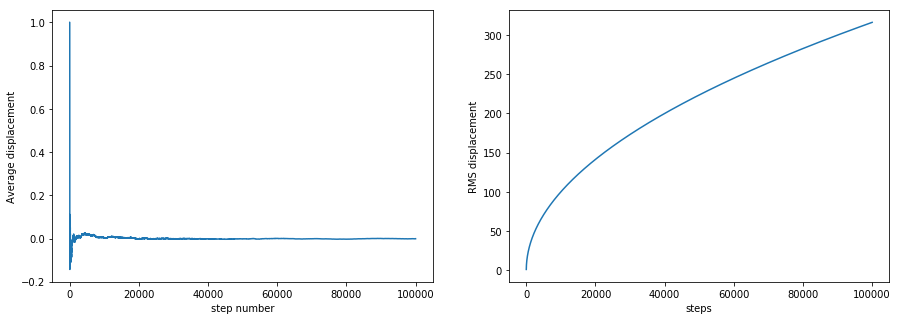

In [793]:
# get an array which stores steps
steps = randomSteps(nsteps, stepsize, dim=1, bias=[0])
# compute average displacement
avgDisps = getAvgDisp(steps)
# compute rms displacement
rmsDisps = getRMSDisp(steps)

fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(range(nsteps), avgDisps)
ax2.plot(range(nsteps), rmsDisps)

ax1.set_xlabel('step number')
ax1.set_ylabel('Average displacement')

ax2.set_xlabel('steps')
ax2.set_ylabel('RMS displacement')

plt.show()

#### Comment:
Average displacement should be zero if the probability of taking a forward step is equal to that of taking a backward step. This is easy to calculate.
i.e. (Average displacement) = (stepsize) * p - (stepsize) * (1-p)
Here p is the probability to have a forward step. For normal random walk, p=0.5. My functions allow to change p through a variable "bias". p=0.5+bias

For example, the average displacement should become 0.4 for bias=0.2. Indeed, the averaged distance converges to 0.4 if nsteps is sufficiently large.

__RMS displacement scales like a square-root of nsteps.__ This is important. In physics, random walks are often used as a simple model of Brownian motion and diffusion which exhibit this feature. is If you are curious about the math, check the following website: https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm 


## 2
__Do the same for a 2D random walk.__

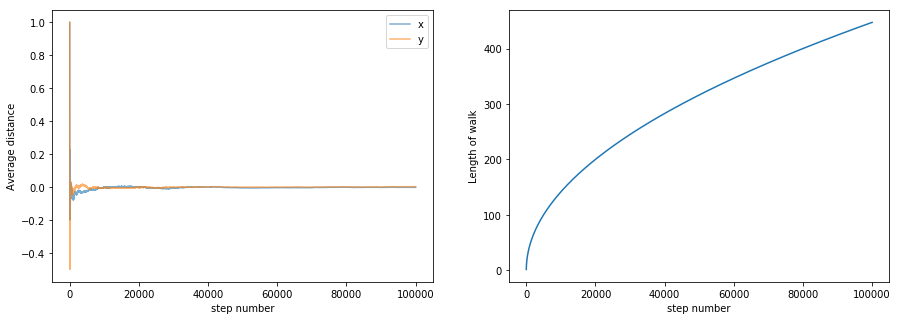

In [84]:
# Set dim=2 for 2D case
steps = randomSteps(nsteps, stepsize, dim=2, bias=[0, 0])
avgDisps = getAvgDisp(steps)
rmsDisps = getRMSDisp(steps)

fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
n = range(nsteps)
ax1.plot(n, avgDisps[:, 0], label='x', alpha=0.6)
ax1.plot(n, avgDisps[:, 1], label='y', alpha=0.6)
ax2.plot(n, rmsDisps)

ax1.set_xlabel('step number')
ax1.set_ylabel('Average distance')
ax1.legend()

ax2.set_xlabel('step number')
ax2.set_ylabel('RMS displacement')

plt.show()

#### Comment:
Very similar to the 1D case. Notice that the length of walk increased by a factor of square-root of 2. 

## 3. 
__Measure the distribution of endpoints of a random walk in 2D with a number of steps = Nsteps, where nsteps = 10^y and y=0, 1, 2, 4, 6.__

- Endpoints of a random walk is given by (x, y) = (avgDisps[-1, 0], avgDisps[-1, 1])
- Let's plot a heatmap about the endpoints. plt.hist2d(), plt.imshow(), plt.pcolormesh(), plt.pcolor() are useful here. 

<Figure size 432x288 with 0 Axes>

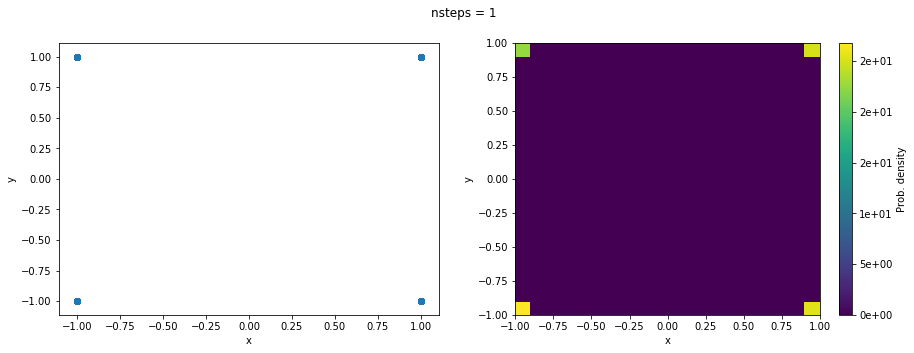

<Figure size 432x288 with 0 Axes>

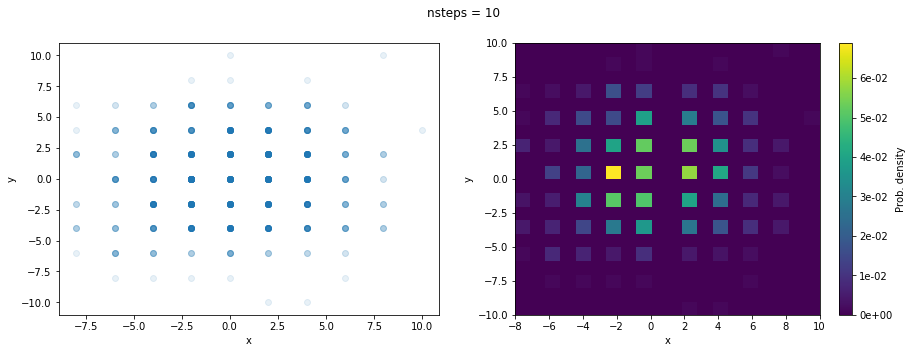

<Figure size 432x288 with 0 Axes>

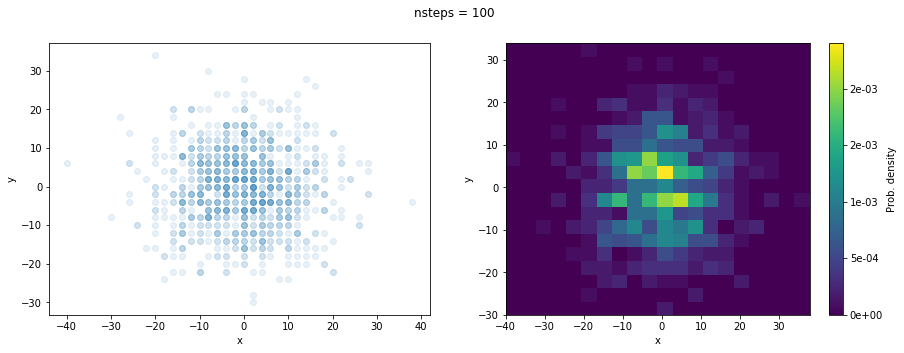

<Figure size 432x288 with 0 Axes>

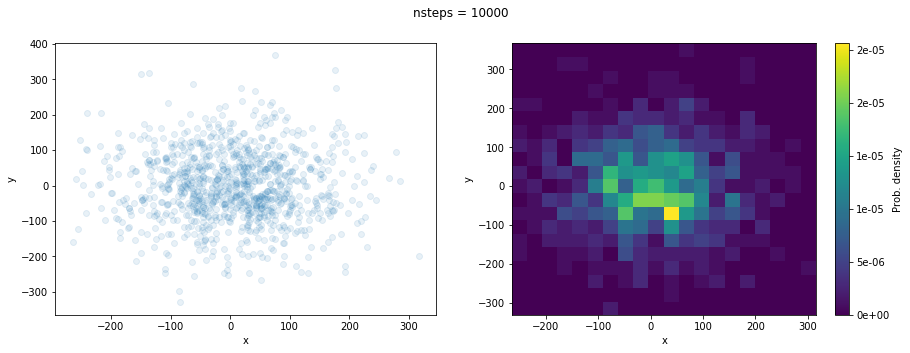

<Figure size 432x288 with 0 Axes>

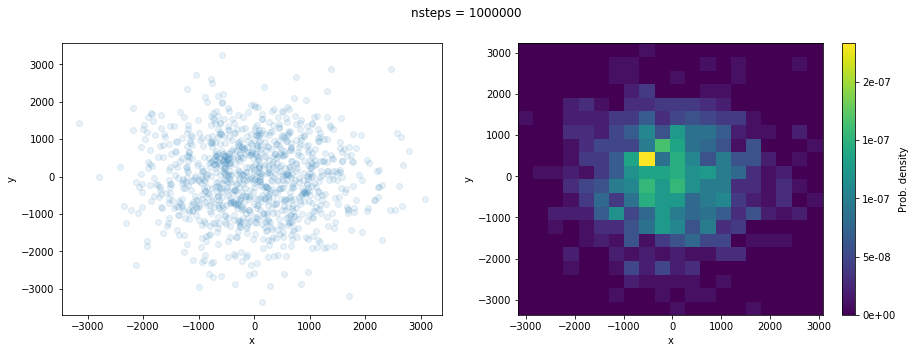

In [10]:
def get_endpoints(nsamples, nsteps, stepsize=1, dim=2, bias=None):
    '''
    Returns endpoints of M random walkers after N steps
    Parameters
    ----------
    nsamples: int, number of random walkers
    nsteps: int, number of random walk steps
    Returns
    ----------
    endpoints: array with shape (nsteps, dim), end positions
    
    '''
    endpoints = np.empty((nsamples, 2))
    for i in range(nsamples):
        steps = randomSteps(nsteps, stepsize, dim=dim, bias=bias)
        for j in range(dim):
            endpoints[i, j] = np.sum(steps[:, j])
    return endpoints

def plot_endpt_dist_2d(nsteps, nsamples, stepsize=1, bins=20):
    '''
    Generates a heatmap about endpoints
    '''
    endpoints = get_endpoints(nsamples, nsteps, stepsize=stepsize, dim=2)
    
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax1.scatter(endpoints[:, 0], endpoints[:, 1], alpha=0.1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    h, xedges, yedges, image = ax2.hist2d(endpoints[:, 0], endpoints[:, 1], bins=bins, normed=True)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    plt.colorbar(image, format='%.0e', label='Prob. density')
    plt.suptitle('nsteps = %d' % nsteps)

    plt.show()
    
    return fig, ax1, ax2

# List of number of steps
nsteps_list = [1, 10, 100, 10**4, 10**6]
nsamples = 1000 # Number of random walkers
dim = 2 # dimension of random walk

for nsteps in nsteps_list:
    plot_endpt_dist_2d(nsteps, nsamples, dim)


When Nstep=1, there are only four configurations that particles could go. The number of possible states (configurations) increases like $(\mbox{Nstep}+1)^{dim}$. As Nstep increases, the PDF started to look like Gaussian.

### 4.
Do a scatter plot of the endpoints of 10000 random walks with nsteps = 1, 10, superimposed on the same plot with large Nsteps (and justify what large means)

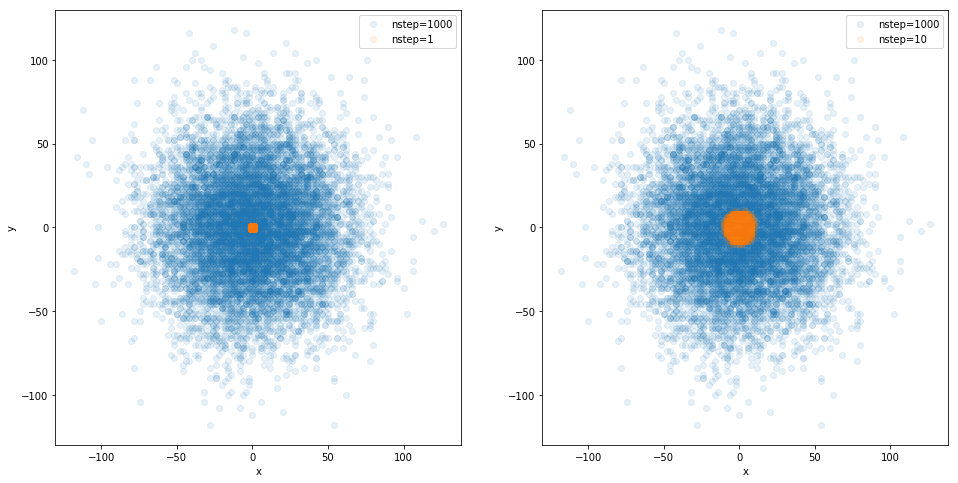

In [794]:
nsamples = 10000 # number of random walks

# Get endpoints for large Nsteps first
endpoints_large = get_endpoints(nsamples, 10**3, stepsize=1, dim=2)
ax1.scatter(endpoints_large[:, 0], endpoints_large[:, 1])
ax2.scatter(endpoints_large[:, 0], endpoints_large[:, 1])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# nsteps = 1
endpoints = get_endpoints(nsamples, 1, stepsize=1, dim=2)
ax1.scatter(endpoints_large[:, 0], endpoints_large[:, 1], alpha=0.1, label='nstep=1000')
ax1.scatter(endpoints[:, 0], endpoints[:, 1], alpha=0.1, label='nstep=1')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

# nsteps = 10
endpoints = get_endpoints(nsamples, 10, stepsize=1, dim=2)
ax2.scatter(endpoints_large[:, 0], endpoints_large[:, 1], alpha=0.1, label='nstep=1000')
ax2.scatter(endpoints[:, 0], endpoints[:, 1], alpha=0.1, label='nstep=10')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.show()


#### Comment
As nsteps increased, you saw that the RMS displacement (length of walk) increased in the previous question. It should be clear now that a random walker had more time to explore the space. The average displacement is still zero for large nsteps; however the RMS displacement scales as a square-root of nsteps. Notice that the effective diameter of each circle is $\sqrt{\mbox{Nstep}}L$ where $L=\sqrt{2}$.

### 5
Write a routine that plots a histogram of the endpoints of W 2D random walks with Nsteps steps and 50 bins, along with the prediction given by a normal, or Gaussian, distribution for x in (−3sigma, 3sigma), where sigma=sqrt(Nsteps)xL (where L is the fixed length of each step).
- __There are multiple ways to do this. I will demonstrate using two 1d histograms and one 2d histogram__

<Figure size 432x288 with 0 Axes>

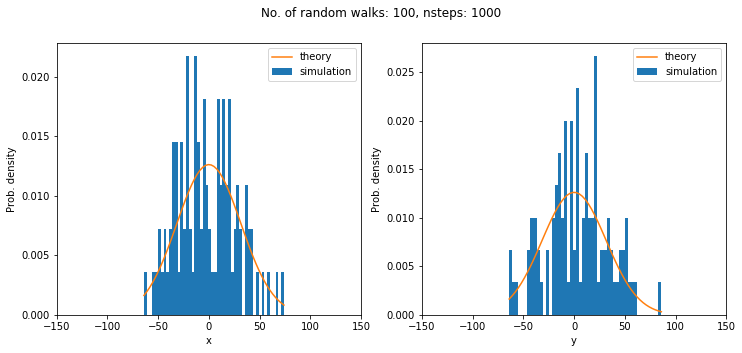

<Figure size 432x288 with 0 Axes>

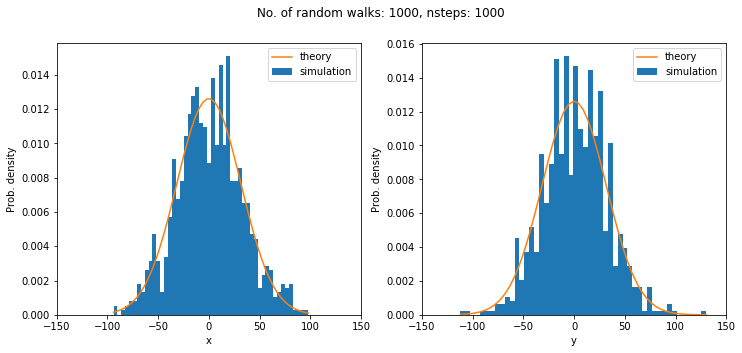

<Figure size 432x288 with 0 Axes>

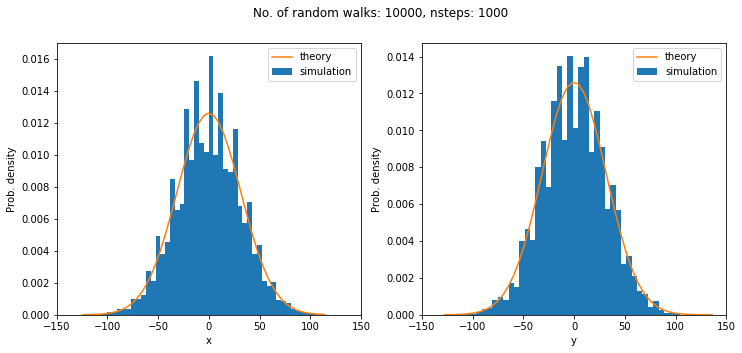

<Figure size 432x288 with 0 Axes>

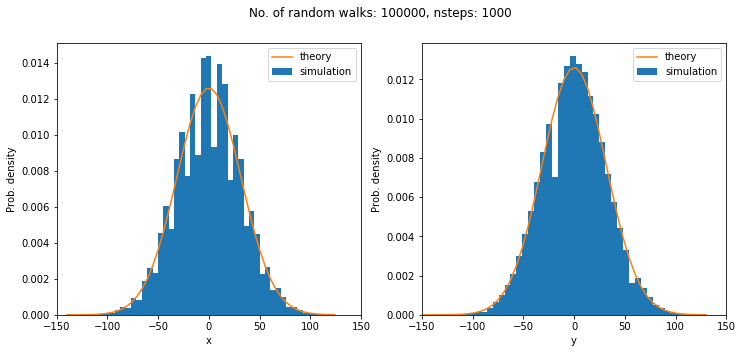

<Figure size 432x288 with 0 Axes>

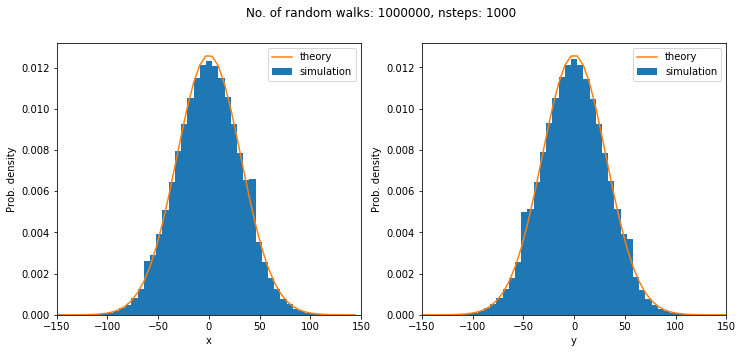

In [322]:
# 1D histograms
def gauss1d(x, sigma, mu=0):
    '''Define 1d gaussian curve'''
    g = 1 / ((2*np.pi*sigma**2)**0.5) * np.exp(-( (x-mu)**2 / ( 2.0 * sigma**2 ) ) )
    return g

def plot_pdf1d(nsteps, nsamples, stepsize, bins=50, show_theory=True):
    '''Generates histogram of endpoints and draws predicted Gaussian curves'''
    sigma = np.sqrt(nsteps)*L # std of a gaussian
    
    plt.figure()
    # 1d histogram
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    endpoints = get_endpoints(nsamples, nsteps, stepsize=stepsize, dim=2)
    xhist, xbins, _ = ax1.hist(endpoints[:, 0], bins=bins, density=True, label='simulation')  # x-component
    yhist, ybins, _ = ax2.hist(endpoints[:, 1], bins=bins, density=True, label='simulation')  # y-component
    if show_theory:
        ax1.plot(xbins, gauss1d(xbins, sigma), label='theory')
        ax2.plot(ybins, gauss1d(ybins, sigma), label='theory')
    
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('Prob. density')
    ax1.set_xlim(-150, 150)
    
    ax2.set_xlabel('y')
    ax2.set_ylabel('Prob. density')
    ax2.set_xlim(-150, 150)
    ax2.legend()
    
    plt.suptitle('No. of random walks: %d, nsteps: %d' % (nsamples, nsteps))

    plt.show()

# Parameters
nsteps = 1000
W = nsamples = 10000 # number of random walks
L = stepsize = 1 # fixed length of each step
bins = 50 # number of bins

for nsamples in [10**2, 10**3, 10**4, 10**5, 10**6]:
    plot_pdf1d(nsteps, nsamples, stepsize, bins=bins)

#### Comment
As W (number of random walks) increases, the PDF of the endpoints converge into a Gaussian distribution.

<Figure size 432x288 with 0 Axes>

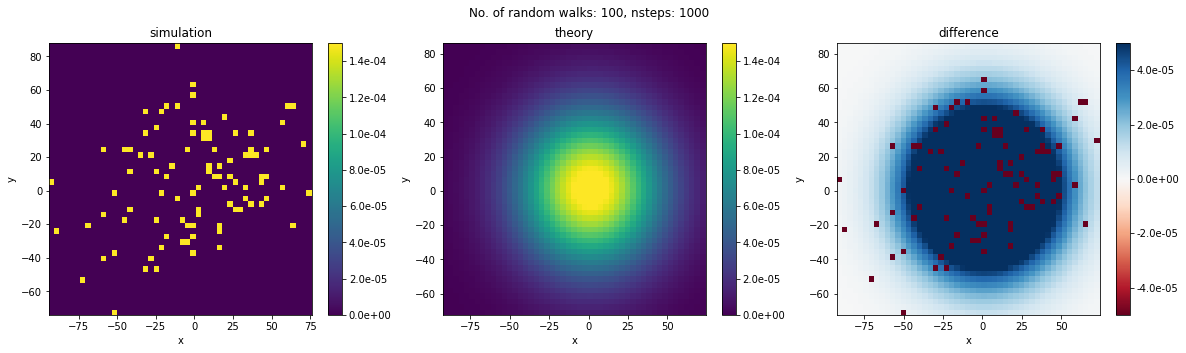

<Figure size 432x288 with 0 Axes>

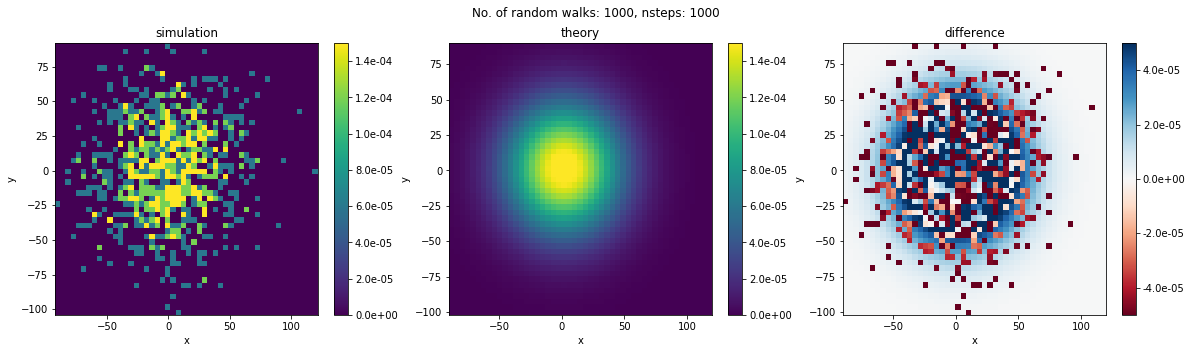

<Figure size 432x288 with 0 Axes>

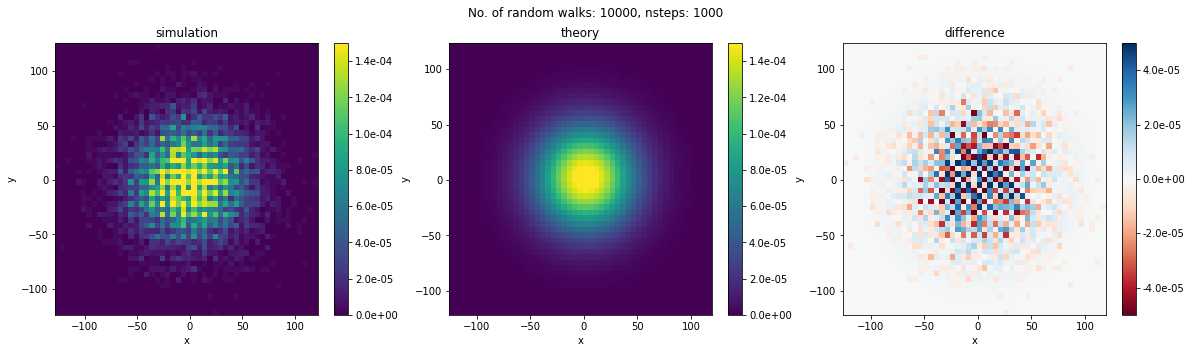

<Figure size 432x288 with 0 Axes>

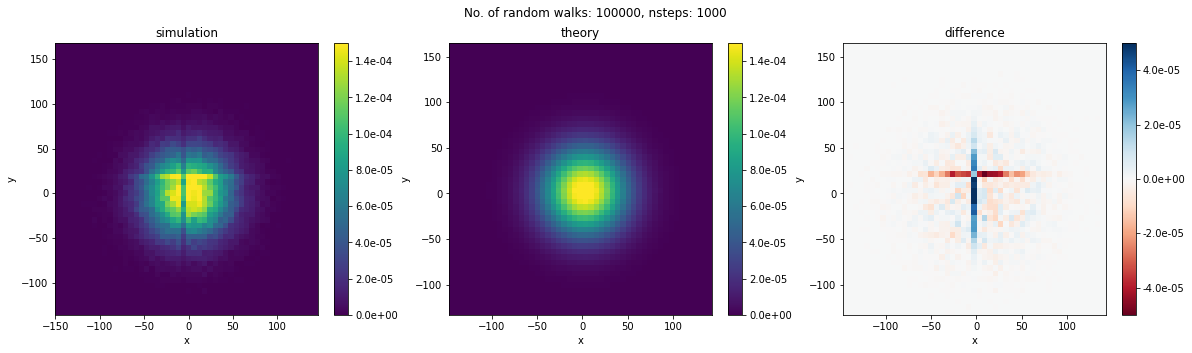

<Figure size 432x288 with 0 Axes>

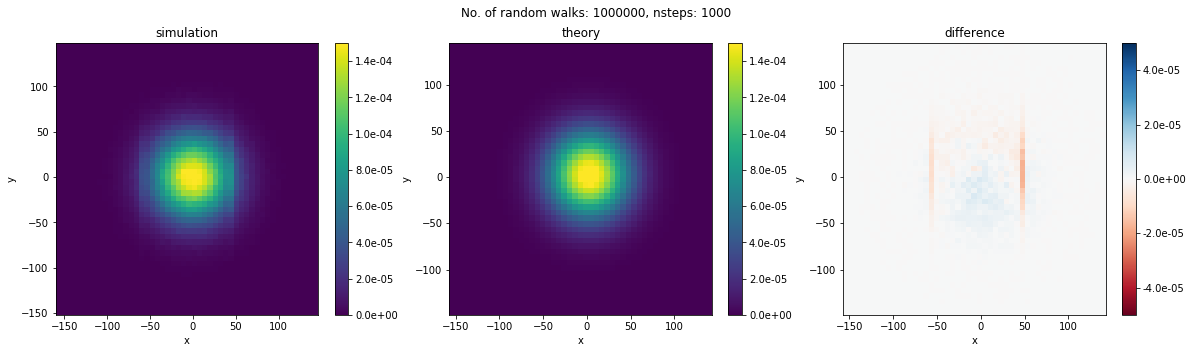

In [797]:
# 2D histogram
plt.close('all')
def gauss2d_norm(x, y, sigma, mux=0, muy=0):
    '''
    Returns 2d gaussian values
    '''
    r = np.sqrt((x-mux)**2+(y-muy)**2)
    g = 1. / (2*np.pi*sigma**2) * np.exp(-( r**2 / ( 2.0 * sigma**2 ) ) )
    return g

def plot_pdf2d(nsteps, nsamples, stepsize, bins=50):
    '''
    Generates heatmaps about prob. dist. of the endpoints.
    '''
    sigma = np.sqrt(nsteps)*stepsize # std of a gaussian
    
    plt.figure()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    
    # simulation 
    endpoints = get_endpoints(nsamples, nsteps, stepsize=stepsize, dim=2)
    h, xedges, yedges, image = ax1.hist2d(endpoints[:, 0], endpoints[:, 1], bins=bins, normed=True, vmin=0, vmax=1.5e-4)
    plt.colorbar(image, ax=ax1, format='%.1e')
    ax1.set_title('simulation')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # theory- 2D gaussian 
    x, y = (xedges[1:] + xedges[:-1]) / 2, (yedges[1:] + yedges[:-1]) / 2
    xgrid, ygrid = np.meshgrid(x, y)
    z_gauss = gauss2d_norm(xgrid, ygrid, sigma)
    image = ax2.pcolormesh(xgrid, ygrid, z_gauss, vmin=0, vmax=1.5e-4)
    plt.colorbar(image, ax=ax2, format='%.1e')
    ax2.set_title('theory')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    # difference
    diff = z_gauss - h.T
    image = ax3.pcolormesh(xgrid, ygrid, diff, cmap='RdBu', vmin=-5e-5, vmax=5e-5)
    plt.colorbar(image, ax=ax3, format='%.1e')
    ax3.set_title('difference')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')

    plt.suptitle('No. of random walks: %d, nsteps: %d' % (nsamples, nsteps))
    plt.show()
    
# Parameters
nsteps = 1000
W = nsamples = 10000 # number of random walks
L = stepsize = 1 # fixed length of each step
sigma = np.sqrt(nsteps)*L # std of a gaussian
bins = 50 # number of bins

for nsamples in [10**2, 10**3, 10**4, 10**5, 10**6]:
    plot_pdf2d(nsteps, nsamples, stepsize, bins=50)


Heatmap is useful to show a quantity which depends on two variables. It is also visually more striking compared to the combined 1d plots. You might have some lines for the simulation results. It is related to the binning and stepsize. <br>

If you look at the difference, the simulation results are pretty close to the predicted Gaussian distribution despite the fact that the simulation uses a discrete stepsize.

## 6
__Do a histogram with W = 10000 and Nstep = 1, 2, 3, 5. How quickly does the Gaussian distribution become a good approximation to the radom walk? How are you quanitfying "good"?__
- Even if Nstep is small, the Gaussian behavior is present.
- In order to assess Gaussianity, one can compare mean and variance/standard deviation.

<Figure size 432x288 with 0 Axes>

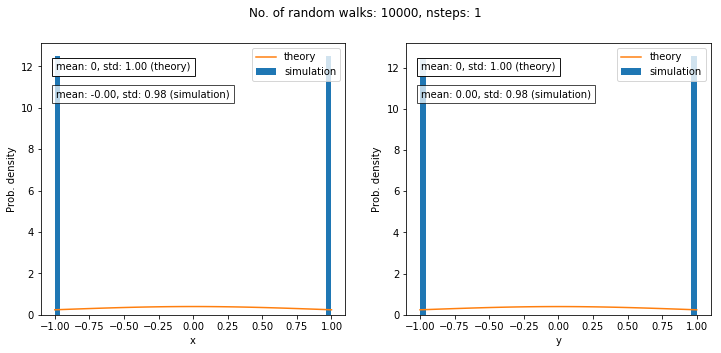

<Figure size 432x288 with 0 Axes>

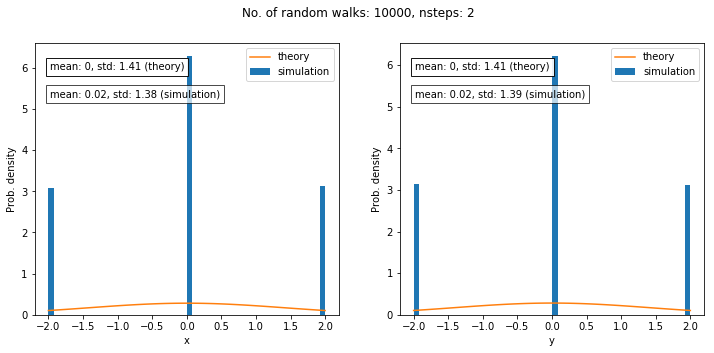

<Figure size 432x288 with 0 Axes>

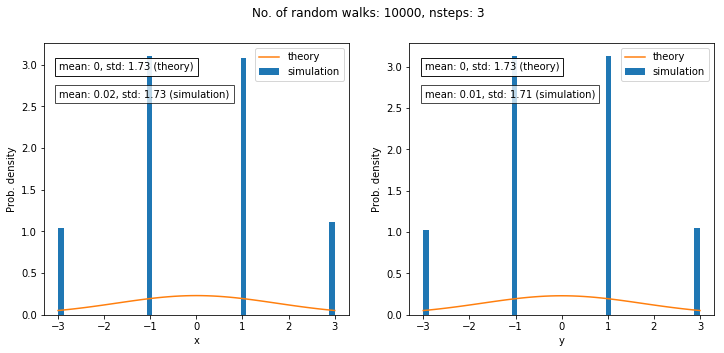

<Figure size 432x288 with 0 Axes>

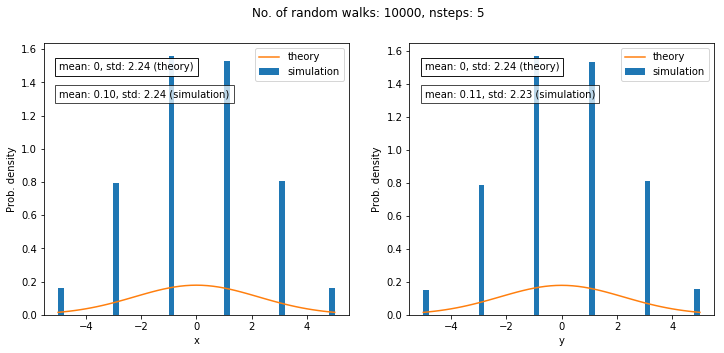

In [95]:
def plot_pdf1d(nsteps, nsamples, stepsize, bins=50):
    """Plot histograms and predicted Gaussian curves"""
    
    sigma = np.sqrt(nsteps)*L # std of a gaussian
    
    plt.figure()
    # 1d histogram
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    endpoints = get_endpoints(nsamples, nsteps, stepsize=stepsize, dim=2) # get endpoints of 2d random walkers
    xhist, xbins, patches = ax1.hist(endpoints[:, 0], bins=bins, density=True, label='simulation')
    yhist, ybins, patches = ax2.hist(endpoints[:, 1], bins=bins, density=True, label='simulation')
    ax1.plot(xbins, gauss1d(xbins, sigma), label='theory') #
    ax2.plot(ybins, gauss1d(ybins, sigma), label='theory')

    # Compute mean, variance and std using discrete probability desity functions (Task 6)
    x, y = (xbins[1:]+xbins[:-1])/2, (ybins[1:]+ybins[:-1])/2 # get middle points of the bins
    dx, dy = xbins[1]-xbins[0], ybins[1]-ybins[0] # get increments in x and y
    
    xmean = np.sum(xhist * x * dx)
    xvar =  np.sum(xhist * (x-xmean)**2 * dx)
    xstd = np.sqrt(xvar)
    ymean = np.sum(yhist * y * dy)
    yvar =  np.sum(yhist * (y-ymean)**2 * dy)
    ystd = np.sqrt(yvar)
    
    
    # show results on the plots
    ax1.text(0.05, 0.8, 'mean: %.2f, std: %.2f (simulation)' %(xmean, xstd), transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    ax1.text(0.05, 0.9, 'mean: 0, std: %.2f (theory)' %(sigma), transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.9))
    ax2.text(0.05, 0.8, 'mean: %.2f, std: %.2f (simulation)' %(ymean, ystd), transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.7))
    ax2.text(0.05, 0.9, 'mean: 0, std: %.2f (theory)' %(sigma), transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.9))

    ax1.legend(loc=1)   # Turn on legend(location=top right)
    ax1.set_xlabel('x')
    ax1.set_ylabel('Prob. density')
    
    ax2.set_xlabel('y')
    ax2.set_ylabel('Prob. density')
    ax2.legend(loc=1)
    
    plt.suptitle('No. of random walks: %d, nsteps: %d' % (nsamples, nsteps))
    
    
    plt.show()
    

# Parameters
W = nsamples = 10000 # number of random walks
L = stepsize = 1 # fixed length of each step
bins = 50 # number of bins

for nsteps in [1, 2, 3, 5]:
    plot_pdf1d(nsteps, nsamples, stepsize, bins=bins)

#### Comment
The PDF obtained from the measurements do not look like the predicted Gaussian because the measurements are discrete. (For example, particles do not occupy say half-integer spots for this simulation.) On the other hand, the predicted Gaussian assumes that the stepsize to be small enough to be considered continuous. Although, you can already see some Gaussianity with small Nsteps. 


Be careful with how you compute mean and variance for discontinuous probability functions.
Mean and std match with Gaussian values. They are in good agreements! 

## 7
__Compare your measurement to the expectation given by the Gaussian and compute a chi-squared. Assess how well your measurement matches the expectation.__

We obtained some distributions about the endpoints of 2d random walks. By eye, it looks Gaussian even at small Nsteps. A little inspection of the moments revealed that the distribution has some Gaussianity. Here we go one step further by conducting the (Pearson's) chi-squared test. This is how it is done.

__1. Set a null hypothesis__
> The null hypothesis here is that the endpoints of the randam walks after N steps obey the Gaussian distribution.

__2. Make a contingency table and compute__ $\chi^2=\Sigma_{cell} \frac{(Observed-Expected)^2}{Expected}$. 
> Observed is the number of random walkers in a certain position. <br>Expected is the number of random walkers expected according to the Gaussian distribution with $\mu=0, \sigma=\sqrt{\mbox{Nsteps}}L$ in a certain position.

__3. Compute p-value__
> p-value is just the area under the $\chi^2$ distribution at the tail. 

__4. Interpret your p-value with the significant level $\alpha=1-q$ you set__ (typically 5%. In this case, it is also called 95% confidence level) 
> If your p-value is greater than your $\alpha$, reject the null hypothesis. <br>
> i.e. if $p > \alpha$, the endpoint distribution is not Gaussian. <br>
if $p < \alpha$, the null hypothesis stands. (However, the null hypothesis is not necessarily true) <br>
(if $\chi_{crit}^2 > \chi^2$, then the null hypothesis stands.)

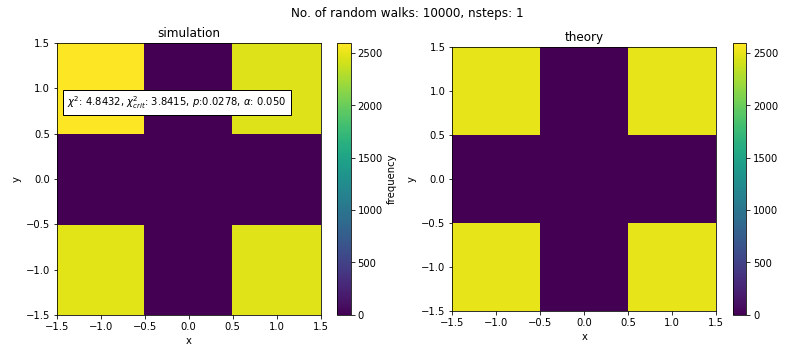

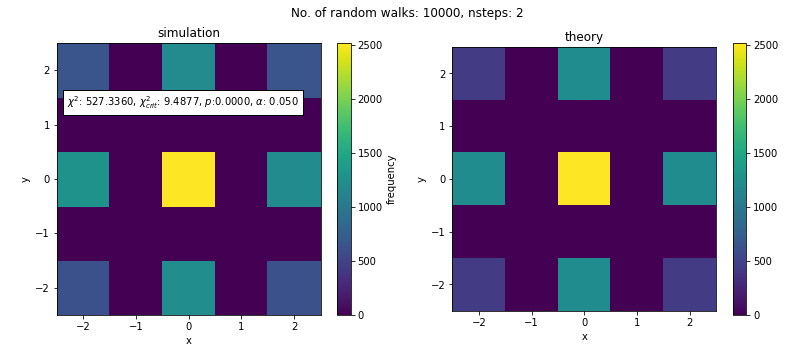

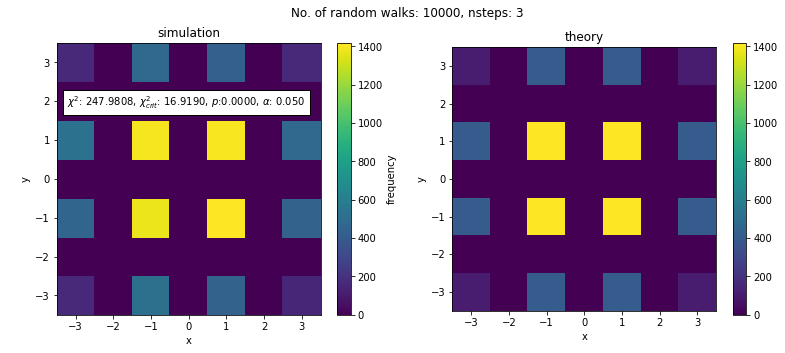

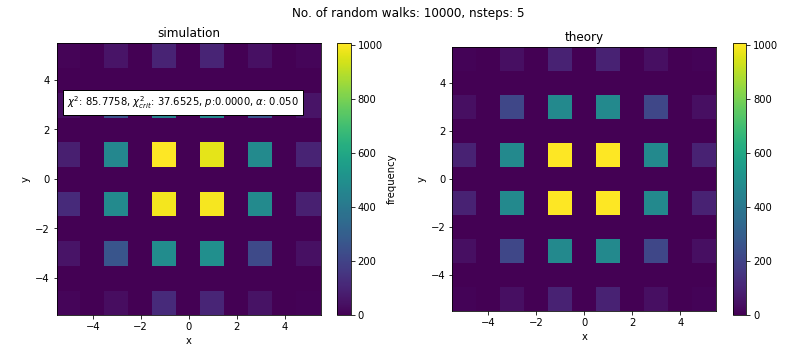

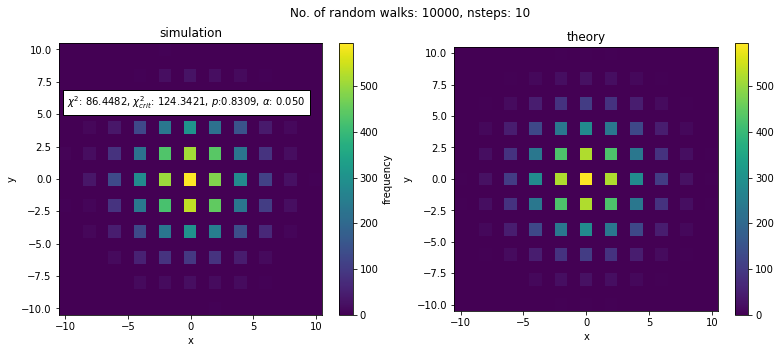

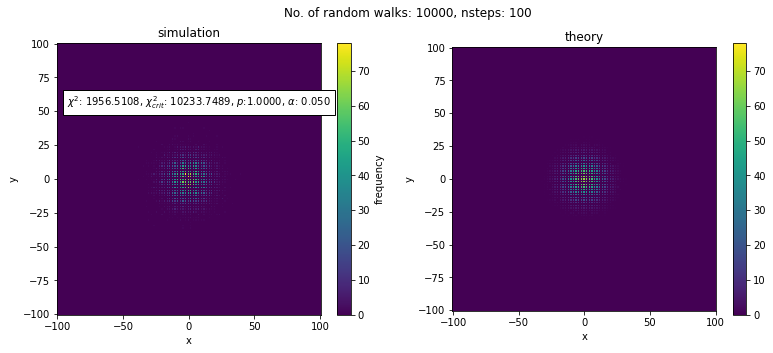

In [571]:
from scipy.stats import chi2

def comp_chi2(nsteps, nsamples, stepsize, dim=2, q=0.95):
    '''
    Computes chi squared and p values for a given random walk samples
    Parameters
    ----------
    nsteps: int, number of total steps of a random walker
    nsamples: int, number of random walkers
    stepsize: float, size of a random walk step 
    dim: int, dimension of random walks
    q: float, confidence level [0, 1]. 1-(significance level)
    Returns
    ----------
    chi_sq, crit, p_value: chi squared value, critical chi squared value for a given confidence interval, p value
    '''
    # Get endpoints 
    endpoints = get_endpoints(nsamples, nsteps, stepsize=stepsize, dim=dim)

    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
    # Set up a 2d histogram
    bins = np.arange(-nsteps-stepsize/2., nsteps+stepsize, stepsize)
    h, xedges, yedges, image = ax1.hist2d(endpoints[:, 0], endpoints[:, 1], bins=bins)
    plt.colorbar(image, ax=ax1, label='frequency')
    
    ind = h==0 # Get boolean matrix indicating positions where frequency was zero.
    h[ind] = np.nan # Replace all zero values with nan
    
    # Compute expected frequency at each possible endpoint (Gaussian)
    x, y = (xedges[1:] + xedges[:-1]) / 2, (yedges[1:] + yedges[:-1]) / 2 # get middle points of the bins for 2d plot
    xgrid, ygrid = np.meshgrid(x, y)
    
    sigma = np.sqrt(nsteps)*L # std of a gaussian
    z_gauss = gauss2d_norm(xgrid, ygrid, sigma) # Get theoretical values
    z_gauss[ind]=0 # Ignore values where random walkers cannot reach.
    z_gauss *= nsamples / np.nansum(z_gauss) # Compute expected frequencies
    image = ax2.imshow(z_gauss * nsamples / np.sum(z_gauss[~ind]), vmin=0, vmax=np.nanmax(h), extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]))
    plt.colorbar(image, ax=ax2)
    ax2.set_title('theory')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    
    # Chi-squared test
    # ...Chi-squared
    chi_sq = np.nansum((h-z_gauss)**2 / z_gauss) # Must use nansum since the array contains lots of nans
    # ...Degree of freedom
    dof = nsteps**dim # For 2d, dof=(nrows-1)*(ncols-1)=nstep**2
    # p-value
    p_value = 1 - chi2.cdf(x=chi_sq, df=dof)
    # critical chi_squared value with confidence level q
    crit = chi2.ppf(q=q, df=dof)
    
    # plotting stuff
    ax1.text(0.05, 0.97, '$\chi^2$: %.4f, $\chi_{crit}^2$: %.4f, $p$:%.4f, $\\alpha$: %.3f' %(chi_sq, crit, p_value, 1-q),\
            transform=ax.transAxes, bbox=dict(facecolor='white'))
    ax1.set_title('simulation')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    plt.suptitle('No. of random walks: %d, nsteps: %d' % (nsamples, nsteps))
    
    plt.show()    
    return chi_sq, crit, p_value   


# Parameters
W = nsamples = 10000 # number of random walks
L = stepsize = 1 # fixed length of each step
bins = 50 # number of bins

for nsteps in [1, 2, 3, 5, 10, 100]:
    comp_chi2(nsteps, nsamples, stepsize)

For nsteps $1 < \sim10$, $\chi^2$ is almost always greater than $\chi_{crit}^2$. It is concluded that the distribution is not Gaussian with 95% confidence level. For $\mbox{Nstep} > \sim10$, $\chi^2$ becomes greater than $\chi_{crit}^2$, meaning that the null hypothesis is accepted. (This does NOT mean that the null hypothesis is true.) i.e. The distribution of the endpoints may be Gaussian for large $\mbox{Nstep}$. As shown in the Task 5, the distribution becomes more Gaussian as $\mbox{Nstep}$ increases. 

Let me also show what the Gaussian model predicts on the average displacement and RMS displacement. <br> 
Since $f(x)=\frac{1}{(2\pi \sigma^2)^{d/2}}\exp{[-\frac{\Sigma_i(x_i-\mu_i)^2}{2\sigma^2}]}$ represents a probability of finding a random walker at $\vec{x}$, you can compute the average displacement and RMS displacement like $<x> = \int xf(x)dx$ and $\sqrt{<x^2>}=\sqrt{\int x^2f(x)dx}$ where $\sigma = \sqrt{\mbox{Nsteps}}L$

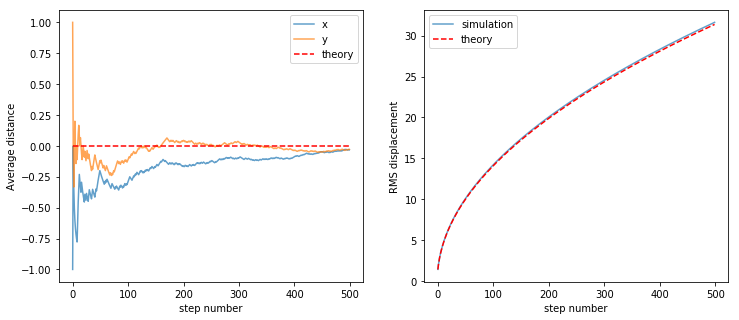

In [572]:
# Compute average displacement and RMS displacement theoretically
import scipy.integrate as integrate

# Parameters
L = stepsize = 1
nsteps=500

# Simulation
steps = randomSteps(nsteps, stepsize, dim=2, bias=[0, 0])
avgDisps = getAvgDisp(steps)
rmsDisps = getRMSDisp(steps)

# Theory: Average displacement and RMS displacement
avgDisps_t, rmsDisp_t = np.zeros(nsteps), np.zeros(nsteps)
for i in range(nsteps):
    sigma = np.sqrt(i+1)*L # std of a gaussian
    avgDisps_t[i] = integrate.quad(lambda x: x*gauss1d(x, sigma), -3*sigma, 3*sigma)[0] # integrate xf(x) [-3sigma, 3sigma]
    rmsDisp_t[i] = np.sqrt(integrate.dblquad(lambda y, x: (x**2+y**2)*gauss2d_norm(x, y, sigma),\
                                             -5*sigma, 5*sigma, lambda x: -3*sigma, lambda x: 3*sigma))[0]

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.plot(range(nsteps), avgDisps[:, 0], alpha=0.7, label='x')
ax1.plot(range(nsteps), avgDisps[:, 1], alpha=0.7, label='y')
ax1.plot(range(nsteps), avgDisps_t, color='r', linestyle='--', label='theory')
ax2.plot(range(nsteps), rmsDisps, alpha=0.7, label='simulation')
ax2.plot(range(nsteps), rmsDisp_t, color='r', linestyle='--', label='theory')

ax1.set_xlabel('step number')
ax1.set_ylabel('Average distance')
ax1.legend()

ax2.set_xlabel('step number')
ax2.set_ylabel('RMS displacement')
ax2.legend()

plt.show()

As you can see, they are in good agreements. The average distance may look slightly off from the theoretical value but they will converge as Nsteps increases. After all, the chance of moving forward is the same as moving backward. 

## Optional
1. Update the model to perform random walks that allow for a uniform direction in angle (i.e. not just +/- 1 in x,y)
2. Extrapolate to 3D
3. Randomize the length of the steps taken.
4. Add an external force or a field that creates a preferred direction.

__Here I wrote up a function which could handle N-D random walks with features 1-4 included.__
1. Modification to include angle is easy. Use random numbers to assign a coordinate (cos(random), sin(random)) for 2D. Change it to (cos(rand1), sin(rand1)cos(rand2), sin(rand1)sin(rand2)) for 3d. For N-D case, repeat the same procedure.
2. This was already incorporated in my old randomSteps(). See 3D plots below!
3. Use random numbers to define stepsize instead of using +/- 1.
4. The easiest way is to add a flow field and let particle be advected. Consider random walkers in a wind. Or, you can come up with interaction between a particle velocity vector and a bias vector. For example, you can introduce a force that damps the motion perpendicular to the bias vector. 

You can color scatter plots etc. with a color scheme you come with. Below, I colored data points by the step number to vidualize the trajectory. 

In [728]:
def dot_product(a, b):
    shape = np.asarray(a).shape
    dim = shape[-1]
    c = np.zeros_like(a[..., 0])
    for i in range(dim):
        c += a[..., i] * b[..., i]
    return c


def randomStepsAngle(nsteps, stepsize, dim=2, bias=None, step='constant'):
    '''
    This function returns the steps using random number generators.
    Parameters
    ----------
    nsteps: int, total number of steps
    stepsize: int/float, size of a step
    dim: int, dimension of random walk
    bias: array-like. Adds a unidirectional, constant flow in the direction of the bias. 
    step: str, If 'random', the magnitude of the step becomes a random number between -stepsize and stepsize.
          choose from 'constant' and 'random'
    Returns
    ----------
    steps: array with shape (nsteps, dim)
    
    In 2d, (step[:, 0], step[:, 1]) is (x, y)
    In 3d, (step[:, 0], step[:, 1], step[:, 1]) is (z, y, x)
    '''
    # Set default bias to be zeros in all directions
    if bias is None:
        bias = [0] * dim
    # Error processing
    elif len(bias) != dim:
        print ('bias must have a dimension of dim=%d!' % dim)
        raise RunTimeError
    
    # Steps in N-d
    steps = np.empty((nsteps, dim))
    for i in range(dim-1):
        rand_nums = np.random.rand(nsteps) * 2 * np.pi
        if i == 0:
            steps[:, i] = np.cos(rand_nums)
            for j in range(i, dim-1):
                steps[:, j+1] = np.sin(rand_nums)[...]
        else:
            steps[:, i] *= np.sin(rand_nums)
            for j in range(i, dim-1):
                steps[:, j+1] *= np.cos(rand_nums)[...]
    if step is 'random':
        stepsize_r = stepsize * np.random.rand(nsteps, dim)
        steps *= stepsize_r
    elif step is 'constant':
        steps *= stepsize
    else:
        print ('Unknown step option! Choose from constant and random')

    # Add a unidirectional, constant flow field
    norm = np.linalg.norm(bias)
    if norm != 0:
        bias_v = np.asarray(bias).reshape((1, dim)) # direction of a flow
        steps += np.ones((nsteps, dim)) * bias_v # advect particles by the flow
    
    return steps

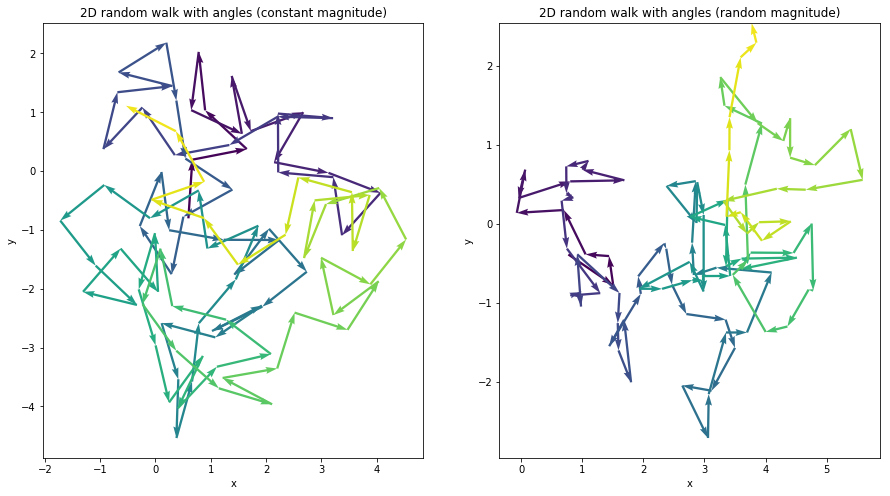

In [729]:
#Parameters
nsteps, stepsize = 100, 1

# 2d random walk with angles (constant stepsize)
steps_2d = randomStepsAngle(nsteps, stepsize, dim=2, bias=None, step='constant')
walk_2d = np.cumsum(steps_2d, axis=0) # position after n steps. At step=0, the position is 0.
x, y = walk_2d[:, 0], walk_2d[:, 1]


# 2d random walk with angles (random stepsize)
steps_2d_r = randomStepsAngle(nsteps, stepsize, dim=2, bias=None, step='random')
walk_2d_r = np.cumsum(steps_2d_r, axis=0) # position after n steps. At step=0, the position is 0.
x_r, y_r = walk_2d_r[:, 0], walk_2d_r[:, 1]

#
xs, ys = [x, x_r], [y, y_r]
titles = ['2D random walk with angles (constant magnitude)', '2D random walk with angles (random magnitude)']

# make a figure object and an ax object
cmap = mpl.cm.get_cmap('viridis')
normalize = mpl.colors.Normalize(vmin=0, vmax=nsteps)
colors = [cmap(normalize(value)) for value in range(nsteps)]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
for i, ax in enumerate([ax1, ax2]):
    x, y = xs[i], ys[i]
    ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=colors)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(titles[i])

plt.show()

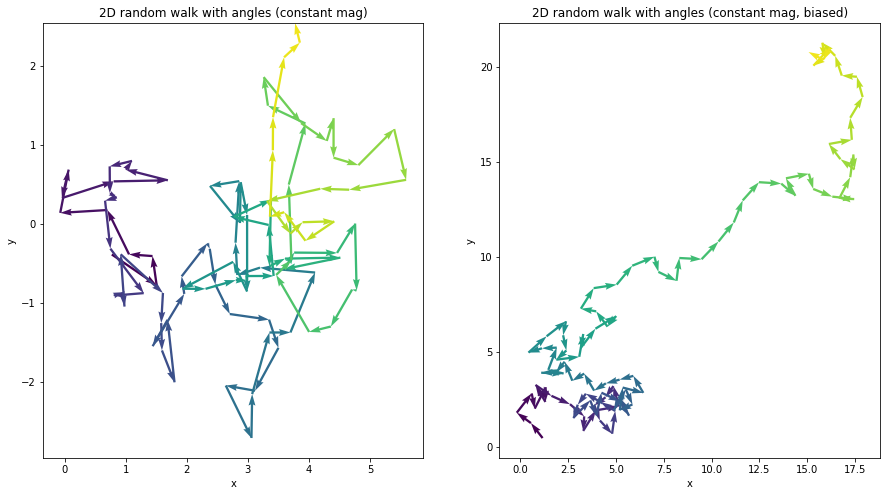

In [742]:
# 2d random walk with angles (constant stepsize, unbiased)
steps_2d = randomStepsAngle(nsteps, stepsize, dim=2, bias=None, step='constant')
walk_2d = np.cumsum(steps_2d_r, axis=0) # position after n steps. At step=0, the position is 0.
x, y = walk_2d_r[:, 0], walk_2d_r[:, 1]

# 2d random walk with angles (constant stepsize, BIASED)
steps_2d_b = randomStepsAngle(nsteps, stepsize, dim=2, bias=[0.2, 0.2], force_const=0.5, step='constant')
walk_2d_b = np.cumsum(steps_2d_b, axis=0) # position after n steps. At step=0, the position is 0.
x_b, y_b = walk_2d_b[:, 0], walk_2d_b[:, 1]


# Prepare figures
xs, ys = [x, x_b], [y, y_b]
titles = ['2D random walk with angles (constant mag)', '2D random walk with angles (constant mag, biased)']

# Color trajectory by step number
cmap = mpl.cm.get_cmap('viridis')
normalize = mpl.colors.Normalize(vmin=0, vmax=nsteps)
colors = [cmap(normalize(value)) for value in range(nsteps)]

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
for i, ax in enumerate([ax1, ax2]):
    x, y = xs[i], ys[i]
    ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=colors)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(titles[i])
    
plt.show()

The simplest way to bias the walkers is to put them in a unidirectional flow. Imagine looking at particles in a river from the shore. Particles are advected by the flow. It may not look like a random walk in the frame of the observer on the shore. However, you can go into the frame comoving with the flow (Lagrangian frame), then you see the random walk again. 

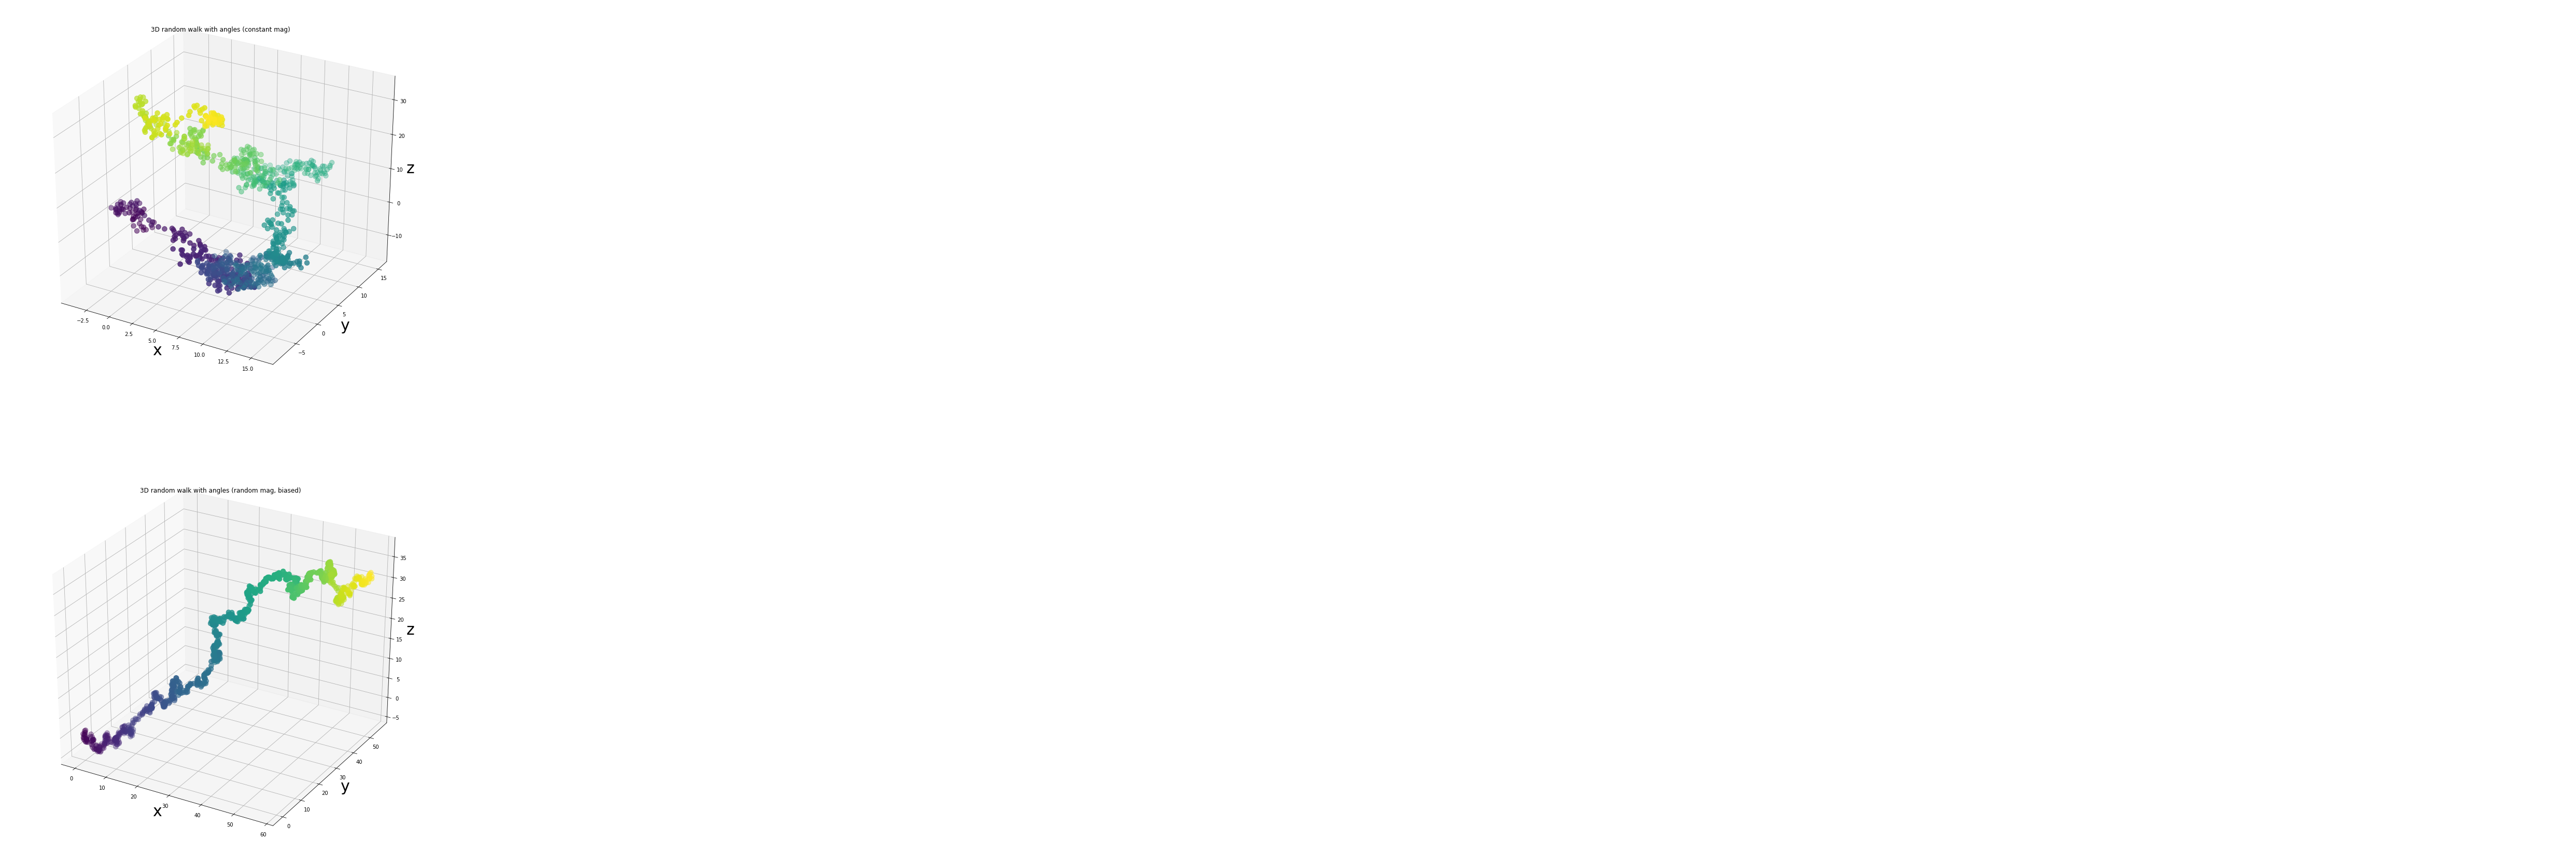

In [779]:
from mpl_toolkits.mplot3d import Axes3D # For 3d plotting
nsteps, stepsize = 1000, 1

steps_3d = randomStepsAngle(nsteps, stepsize, dim=3, bias=None, step='constant')
walk_3d = np.cumsum(steps_3d, axis=0) # position after n steps. At step=0, the position is 0.

steps_3d_rb = randomStepsAngle(nsteps, stepsize, dim=3, bias=[0.05, 0.05, 0.05], step='random')
walk_3d_rb = np.cumsum(steps_3d_rb, axis=0) # position after n steps. At step=0, the position is 0.


# Color trajectory by step number
cmap = mpl.cm.get_cmap('viridis')
normalize = mpl.colors.Normalize(vmin=0, vmax=nsteps)
colors = [cmap(normalize(value)) for value in range(nsteps)]

fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(walk_3d[:,2], walk_3d[:,1], walk_3d[:,0],s=90, color=colors)

ax.set_xlabel('x', fontsize=30)
ax.set_ylabel('y', fontsize=30)
ax.set_zlabel('z', fontsize=30)
ax.set_title('3D random walk with angles (constant mag)')

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(walk_3d_rb[:,2], walk_3d_rb[:,1], walk_3d_rb[:,0],s=90, color=colors)

ax2.set_xlabel('x', fontsize=30)
ax2.set_ylabel('y', fontsize=30)
ax2.set_zlabel('z', fontsize=30)
ax2.set_title('3D random walk with angles (random mag, biased)')


plt.show()